In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os, cv2, itertools # cv2 -- OpenCV
import matplotlib.pyplot as plt 
import zipfile as ZipFile
import random
%matplotlib inline

In [2]:
from zipfile import ZipFile
zf = ZipFile(r'C:\Users\נעמיה\data-science\sb\dogs-vs-cats\train.zip', 'r')
zf.extractall(r'C:\Users\נעמיה\data-science\sb')
zf.close()

In [3]:
filenames = os.listdir(r'C:\Users\נעמיה\data-science\sb\train')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append('dog')
    else:
        categories.append('cat')

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [4]:
df.head(10)

,filename,category
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat
5,cat.10000.jpg,cat
6,cat.10001.jpg,cat
7,cat.10002.jpg,cat
8,cat.10003.jpg,cat
9,cat.10004.jpg,cat


In [5]:
df.tail(10)

,filename,category
24990,dog.9990.jpg,dog
24991,dog.9991.jpg,dog
24992,dog.9992.jpg,dog
24993,dog.9993.jpg,dog
24994,dog.9994.jpg,dog
24995,dog.9995.jpg,dog
24996,dog.9996.jpg,dog
24997,dog.9997.jpg,dog
24998,dog.9998.jpg,dog
24999,dog.9999.jpg,dog


(array([0, 1]), [Text(0, 0, 'cat'), Text(1, 0, 'dog')])

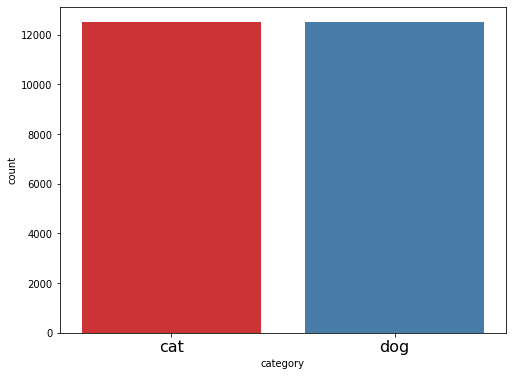

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="category",palette="Set1")
plt.xticks(fontsize=16)

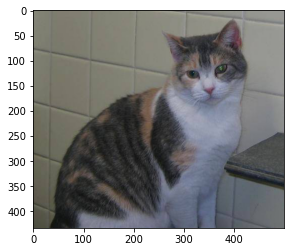

In [68]:
sample = random.choice(filenames)
example = r'./train/'+ sample
plt.imshow(plt.imread(example))

In [69]:
dim = (250, 250)
def resize_image(path):
    image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return cv2.resize(image, dim, interpolation = cv2.INTER_CUBIC)

In [70]:
resize_image(image).shape

(250, 250, 3)

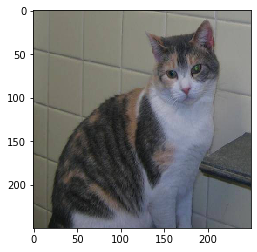

In [71]:
from matplotlib import pyplot as plt

data=resize_image(example)
plt.imshow(data, interpolation='nearest')
plt.show()

In [53]:
local_zip = r'C:\Users\נעמיה\data-science\sb\dogs-vs-cats\train.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('.')
zip_ref.close()

In [66]:
base_dir = os.listdir(r'C:\Users\נעמיה\data-science\sb\dogs-vs-cats\train.zip')
# train_dir = os.path.join(base_dir)
# train_img_names = os.listdir(train_dir)
base_dir

NotADirectoryError: [WinError 267] The directory name is invalid: 'C:\\Users\\נעמיה\\data-science\\sb\\dogs-vs-cats\\train.zip'

In [64]:
train_img_names[2000:5000]

['cat.11798.jpg',
 'cat.11799.jpg',
 'cat.118.jpg',
 'cat.1180.jpg',
 'cat.11800.jpg',
 'cat.11801.jpg',
 'cat.11802.jpg',
 'cat.11803.jpg',
 'cat.11804.jpg',
 'cat.11805.jpg',
 'cat.11806.jpg',
 'cat.11807.jpg',
 'cat.11808.jpg',
 'cat.11809.jpg',
 'cat.1181.jpg',
 'cat.11810.jpg',
 'cat.11811.jpg',
 'cat.11812.jpg',
 'cat.11813.jpg',
 'cat.11814.jpg',
 'cat.11815.jpg',
 'cat.11816.jpg',
 'cat.11817.jpg',
 'cat.11818.jpg',
 'cat.11819.jpg',
 'cat.1182.jpg',
 'cat.11820.jpg',
 'cat.11821.jpg',
 'cat.11822.jpg',
 'cat.11823.jpg',
 'cat.11824.jpg',
 'cat.11825.jpg',
 'cat.11826.jpg',
 'cat.11827.jpg',
 'cat.11828.jpg',
 'cat.11829.jpg',
 'cat.1183.jpg',
 'cat.11830.jpg',
 'cat.11831.jpg',
 'cat.11832.jpg',
 'cat.11833.jpg',
 'cat.11834.jpg',
 'cat.11835.jpg',
 'cat.11836.jpg',
 'cat.11837.jpg',
 'cat.11838.jpg',
 'cat.11839.jpg',
 'cat.1184.jpg',
 'cat.11840.jpg',
 'cat.11841.jpg',
 'cat.11842.jpg',
 'cat.11843.jpg',
 'cat.11844.jpg',
 'cat.11845.jpg',
 'cat.11846.jpg',
 'cat.11847.jpg',

In [39]:
base_dir = r'C:\Users\נעמיה\data-science\sb\dogs-vs-cats'
train_dir = os.path.join(base_dir, "train.zip")
test_dir = os.path.join(base_dir, "test.zip")

# with zipfile.ZipFile(train_dir,"r") as z:
#     z.extractall()

# with zipfile.ZipFile(test_dir, "r") as z:
#     z.extractall()

In [40]:
with ZipFile(train_dir, 'r') as zip: 
    print('Extracting all the files for training data now...') 
    zip.extractall() 
    print('Done!')

TypeError: 'module' object is not callable

In [29]:
filenames = os.listdir("/kaggle/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [26]:
df

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0
...,...,...
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
